Здесь мы играемся с входными данными и учимся строить и рисовать граф <b>G<b>

In [31]:
%matplotlib inline
import networkx
from networkx import *

In [2]:
file = open('id_group.txt')
data_id=file.read().split('\n')
data_id = list(map(int,data_id))

<b>data_id</b> – это лист с айди вк по которым будет происходить поиск общих друзей

In [3]:
data_id

[559640345,
 29759351,
 120435774,
 78517271,
 55564167,
 202514864,
 79818398,
 18214699,
 25689500,
 322913600,
 32418429,
 32784038,
 55355150,
 65817487,
 76637395,
 31710423,
 557916962,
 44907648,
 183239130,
 180691077]

Пробуем рисовать граф с помощью модуля networkx. Можно задавать узлы сразу массивом и заполнять в граф используя  <b>.add_nodes_from(nodes)</b>, а ребра можно задавать с помощью массива пар связи узлов (<b>.add_edges_from(edges)</b>)
    
 Узлы и связи можно добовлять и по одному: 
     <b>G.add_node(10) G.add_edge(10,0)</b>
 

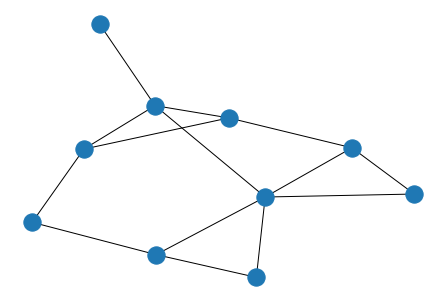

In [32]:
G = nx.Graph()
nodes = [0,1,2,3,4,5,6,7,8]
edges = [(0,1),(1,2),(2,3), (3,4), (4,5), (5,6),(6,7),(7,8),(8,1),(5,0),(5,6),(5,3),(5,7),(0,8)]
G.add_nodes_from(nodes)
G.add_edges_from(edges)
G.add_node(10)
G.add_edge(10,0)
pos = nx.circular_layout(G)
nx.draw(G)   # тип по умолчанию spring_layout

In [33]:
write_edgelist(G, "Graph.txt")

С помощью изменения параметра <b>alpha</b> делаем так, чтобы у элемента с наибольшим количеством связей была наибольшая насыщенность цвета.

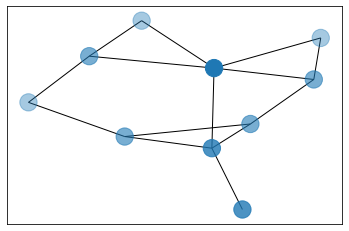

In [4]:
G.degree[1]
pos=nx.spring_layout(G)
pos
eges=[]
for n in nodes:
    eges.append(G.degree[n])
max_eg=max(eges)
alfa = []
for n in nodes:
    alfa.append(G.degree[n]/max_eg)
alfa
draw_networkx_nodes(G,pos,alpha=alfa)
draw_networkx_edges(G, pos)

в модуле networkx есть встроенный метод расчета центральности кратчайшего пути <b>betweenness_centrality(G)</b>

0.4212962962962963

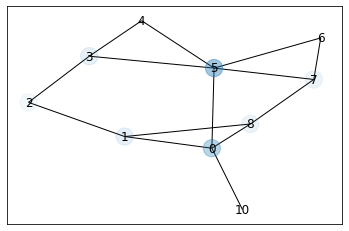

In [29]:
betweenness_centrality(G).values()
draw_networkx_nodes(G,pos,alpha=betweenness_centrality(G).values())
draw_networkx_edges(G, pos)
draw_networkx_labels(G, pos)
di=betweenness_centrality(G)
max(betweenness_centrality(G).values())


In [1]:
#метод центральности
import numpy as np
from queue import Queue
from copy import deepcopy

def centrisity(A, dists=None, paths=None):
    '''Find centrisity measure.  

    Returns np.array of size "len(A)" where centrisity measure for each node  
    is stored.

    Arguments:
    A     -- adjacency matrix of count, can be either list(list(int)) or  
    np.array(np.array(integer))  
    dists -- can be None or list(list(int)) or np.array(np.array(int)).  
    Needs to be same size as A. Used to store distances of shortest  
    paths. If None, distances are not saved. Default to None.  
    paths -- can be None or list(list). Needs to be same size as len(A). 
    Used to store shortest paths. If None, paths are not saved.  
    Default to None.  

    '''

    def _dijkstra(start_node):
        def _relax_node(node):
            for i in range(n):
                if i == node:
                    continue
                if A[_relax_node][i] != -1:
                    new_dist = dists[node] + A[node][i]
                    if new_dist < dists[i]:
                        parents[i] = node                   # Save information to restore paths.
                        dists[i] = new_dist
            # Once relaxed nodes are never meant to be used again.  
            used[node] = True
        
        def _min_distanced_node():
            idx = -1
            for i in range(n):
                if used[i] or dist[i] == float('inf'):
                    continue
                elif idx == -1 or dist[i] < dist[idx]:
                    idx = i
            return idx
        
        used = [False for _ in range(n)]
        dists = [float('inf') for _ in range(n)]
        dists[start_node] = 0
        parents = [-1 for _ in range(n)]
        paths = [[] for _ in range(n)]
        
        # Relax all nodes until we process them all.  
        _relax_node(start_node)
        for _ in range(n-1):
            node_i = _min_distanced_node()
            if node_i == -1:
                break
            _relax_node(node_i)
            
        # Restoring paths.  
        for i in range(n):
            last_node = parents[i]
            if last_node == -1:
                continue

            while last_node != start_node:
                paths[i].append(last_node)
                last_node = parents[last_node]
            paths[i].append(start_node)
        # Restored paths are in backward order. One needs to reverse them.
        paths = [[x for x in reversed(path)] for path in paths]
        
        return np.array(dists),np.array(paths)
    
    n = len(A)
    result = np.array([0 for _ in range(n)],dtype=np.float64)
    save_dists = type(dists) == type(np.array(0)) or \
                   type(dists) == type(list())
    save_paths = type(paths) == type(np.array(0)) or \
                   type(paths) == type(list())
    paths_no = 0
    
    # Idea: process Dijkstra for each node and find amount of   
    # shortest paths, then count every node in every path.  
    for i in range(n):
        dists_i,paths_i = _dijkstra(i)
        # One don't need to count way from the node to itself.  
        # So we subtract that path from total count.  
        paths_no += len(np.where(dists_i < float('inf'))[0]) - 1

        for path in paths:
            for node in path:
                result[node] += 1

        # Save distances and/or paths, if needed.  
        if save_dists:
            dists[i][j] = deepcopy(dists_i)
        if save_paths:
            for j in range(n):
                paths[i][j] = deepcopy(paths_i[j])
                
    # Normalizing results.  
    result /= paths_no

    return res

    